In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import manifold
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
import math
import statistics
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [2]:
### Help functions

def painted_fenced(col):
    
    if col == 'N':
        return 1
    else:
        return 0
    
    return col


def garden(col):
    
    if col == 'V':
        return 1
    else:
        return 0
    
    return col


def settlement(col):
    
    if col == 'U':
        return 1
    else:
        return 0
    
    return col

def missing_values(col):
    col = col.fillna(round(col.mean), inplace=True)
    
    return col

In [3]:
## Importing the train and test data sets.

train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
description = pd.read_csv('VariableDescription.csv')

In [4]:
description

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [5]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1,0,N,V,V,U,290.0,1,1960.0,0,1053,0
1,H2037,2015,1,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1,0,N,V,V,U,595.0,1,1960.0,0,1053,0
3,H3834,2013,1,0,V,V,V,U,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1,0,V,N,O,R,680.0,1,1800.0,3,1053,0


Engineering the train data

In [6]:
train_data['Building_Painted'] = train_data['Building_Painted'].apply(painted_fenced)
train_data['Building_Fenced'] = train_data['Building_Fenced'].apply(painted_fenced)
train_data['Garden'] = train_data['Garden'].apply(garden)
train_data['Settlement'] = train_data['Settlement'].apply(settlement)

In [7]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1,0,1,0,1,1,290.0,1,1960.0,0,1053,0
1,H2037,2015,1,0,0,1,0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1,0,1,0,1,1,595.0,1,1960.0,0,1053,0
3,H3834,2013,1,0,0,0,1,1,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1,0,0,1,0,0,680.0,1,1800.0,3,1053,0


In [8]:
test_data['Building_Painted'] = test_data['Building_Painted'].apply(painted_fenced)
test_data['Building_Fenced'] = test_data['Building_Fenced'].apply(painted_fenced)
test_data['Garden'] = test_data['Garden'].apply(garden)
test_data['Settlement'] = test_data['Settlement'].apply(settlement)

In [9]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1,0,0,1,0,0,300.0,1,1960.0,3,3310
1,H11921,2016,99726776,0,0,1,0,0,300.0,1,1960.0,3,3310
2,H9805,2013,369863014,0,0,0,1,1,790.0,1,1960.0,0,3310
3,H7493,2014,1,0,0,1,0,0,1405.0,1,2004.0,3,3321
4,H7494,2016,1,0,0,1,0,0,1405.0,1,2004.0,3,3321


## UNIVARIATE ANALYSIS

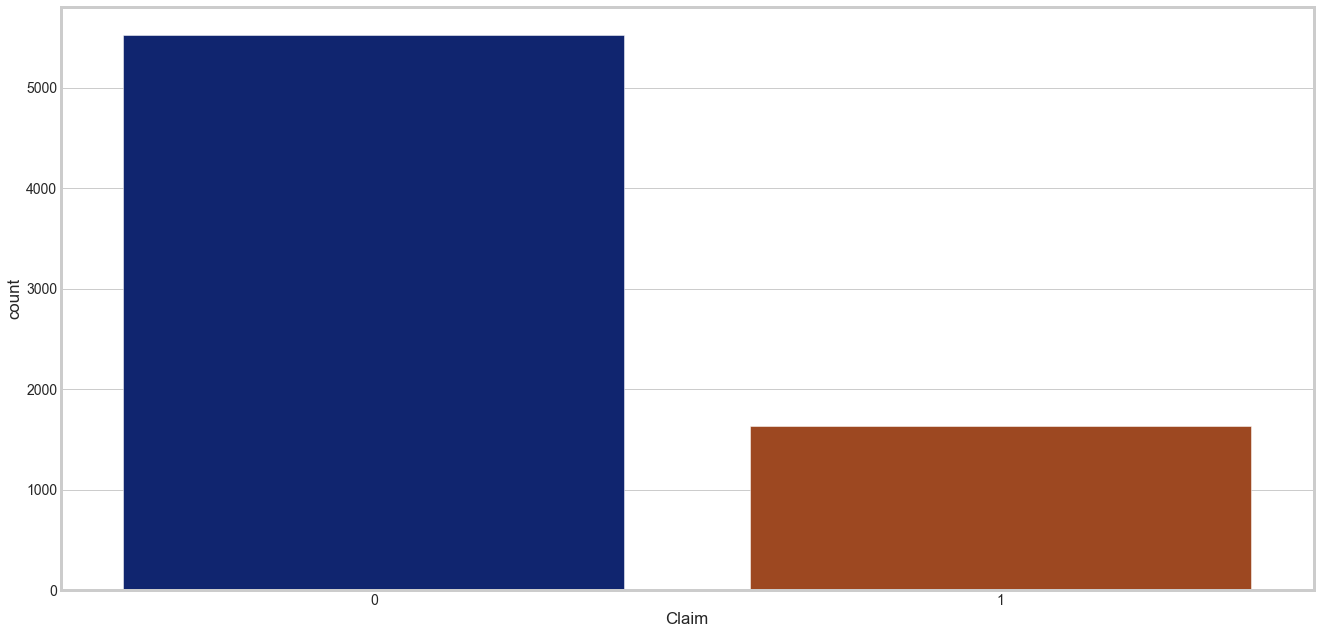

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='Claim', palette= 'dark') #explore target variables

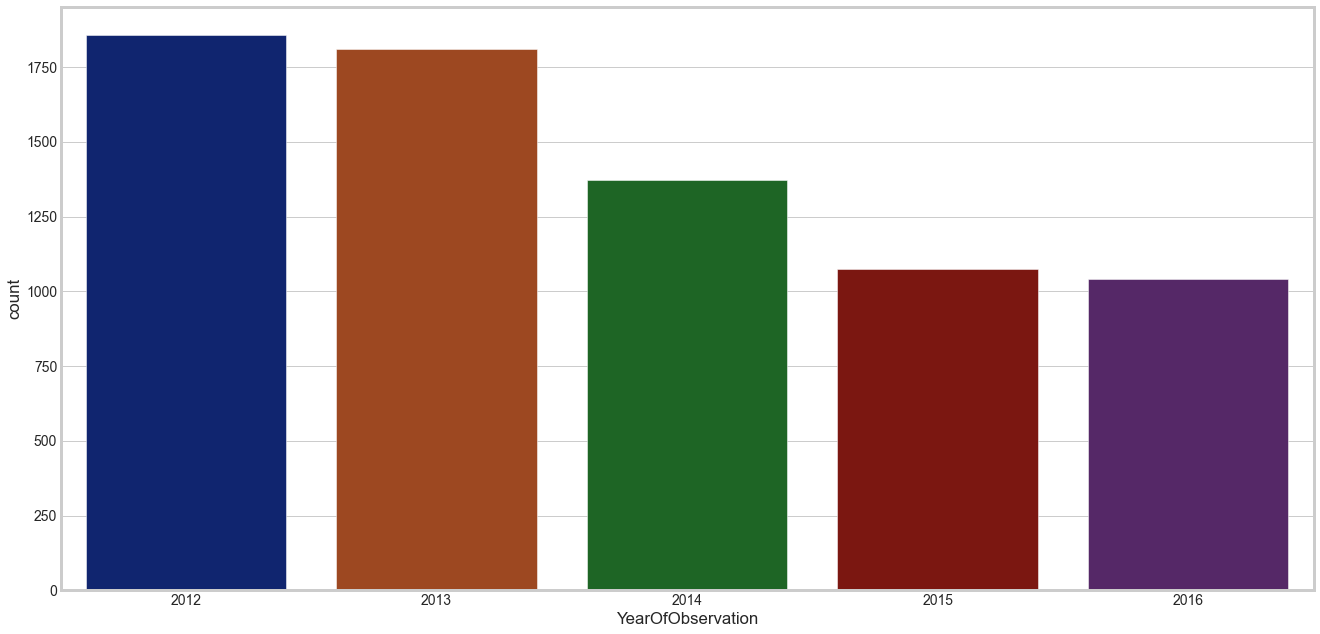

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='YearOfObservation', palette='dark')

In [12]:
train_data['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [13]:
def year_rating(col):
    
    
    if col<=0:
        rating = 0
    elif col<=2012:
        rating = 1
    elif col<=2013:
        rating = 2
    elif col<=2014:
        rating = 3
    elif col<=2015:
        rating = 4
    else:
        rating = 5
    
    return rating

train_data['YearOfObservation'] = train_data['YearOfObservation'].apply(year_rating)
test_data['YearOfObservation'] = test_data['YearOfObservation'].apply(year_rating)

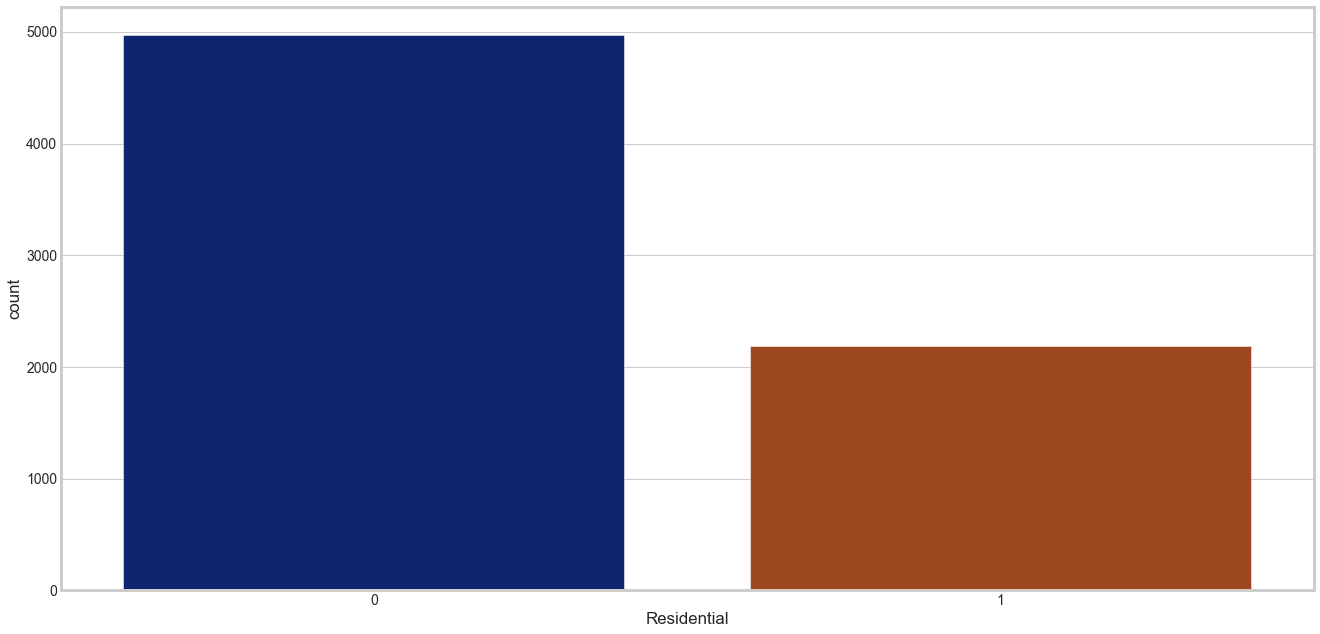

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='Residential', palette='dark')

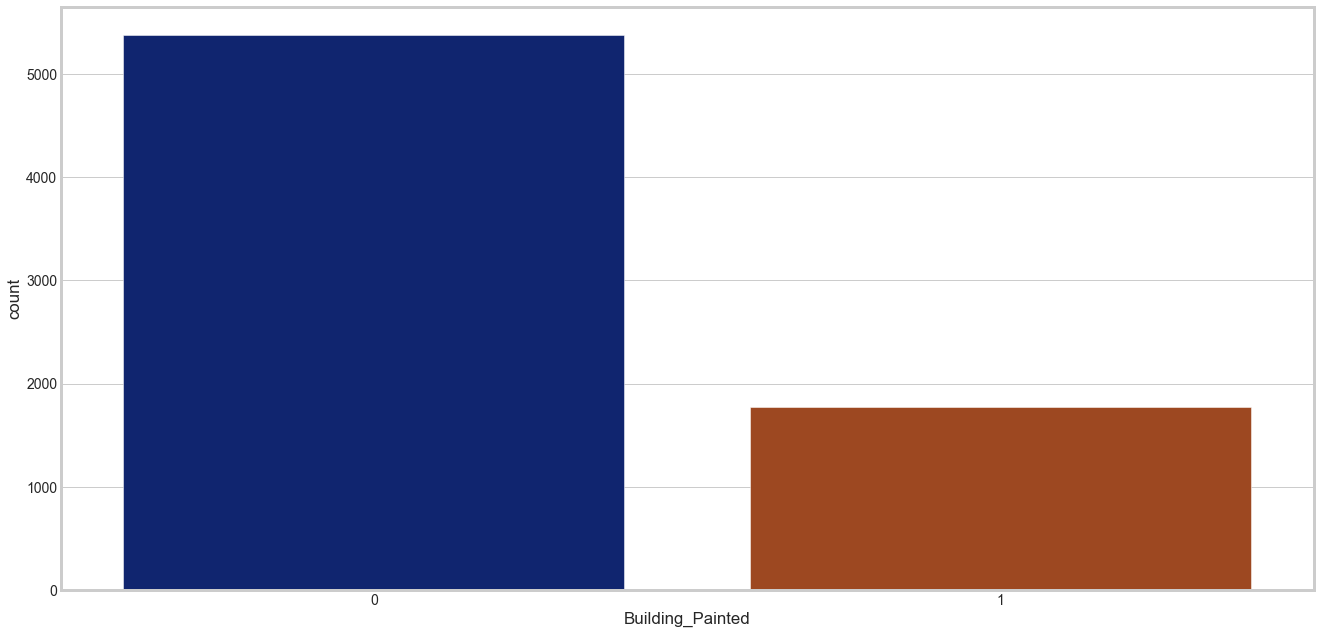

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='Building_Painted', palette='dark')

The train dataset has 3608 fenced houses.
The train dataset has 3552 houses without fence.


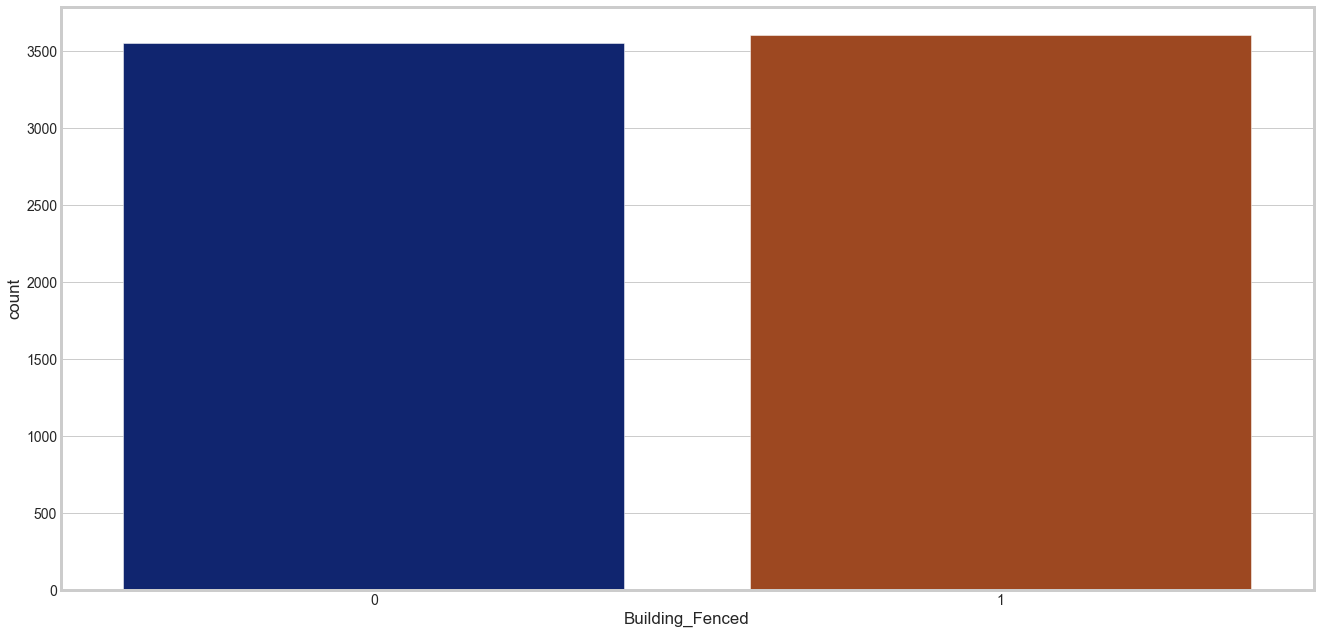

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))


fenced = train_data['Building_Fenced'].value_counts()[1]
NotFenced = train_data['Building_Fenced'].value_counts()[0]
print('The train dataset has {} fenced houses.'.format(fenced))
print('The train dataset has {} houses without fence.'.format(NotFenced))
sns.countplot(data= train_data, x='Building_Fenced', palette='dark')

The train dataset has 3551 houses with garden.
The train dataset has 3609 houses without a garden.


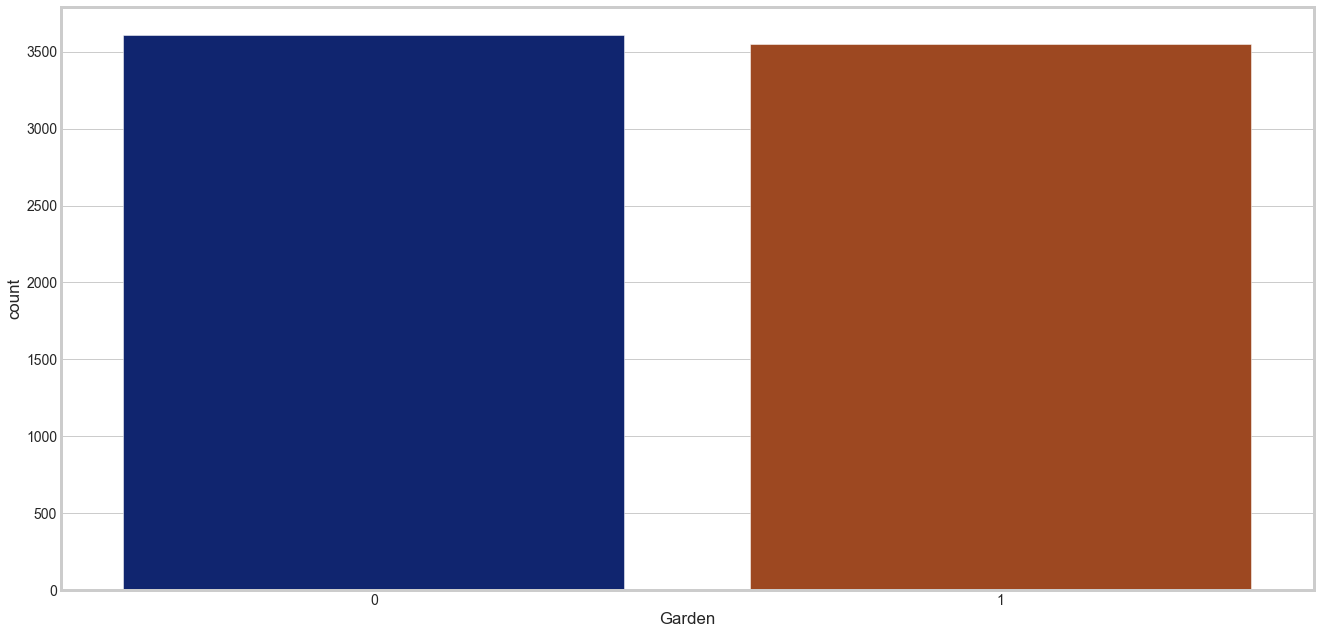

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))


garden = train_data['Garden'].value_counts()[1]
no_garden = train_data['Garden'].value_counts()[0]
print('The train dataset has {} houses with garden.'.format(garden))
print('The train dataset has {} houses without a garden.'.format(no_garden))
sns.countplot(data= train_data, x='Garden', palette='dark')

The train dataset has 3550 urban settlement.
The train dataset has 3610 rural settlement.


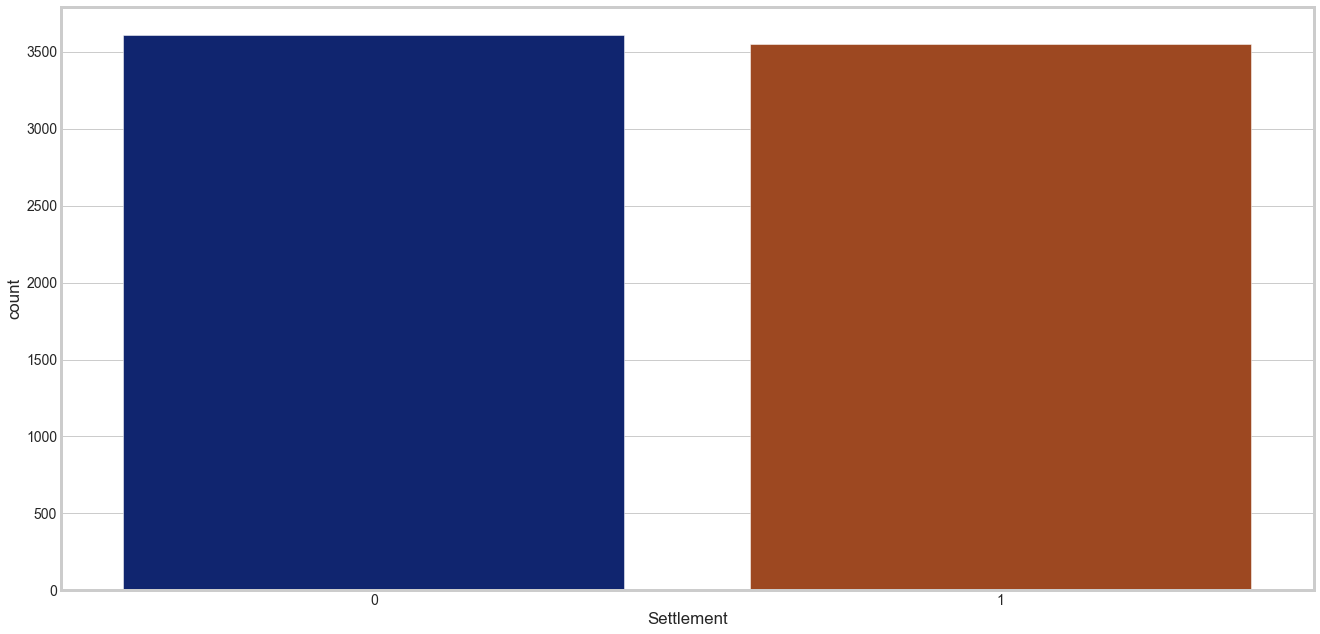

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))


urban = train_data['Settlement'].value_counts()[1]
rural = train_data['Settlement'].value_counts()[0]
print('The train dataset has {} urban settlement.'.format(urban))
print('The train dataset has {} rural settlement.'.format(rural))
sns.countplot(data= train_data, x='Settlement', palette='dark')

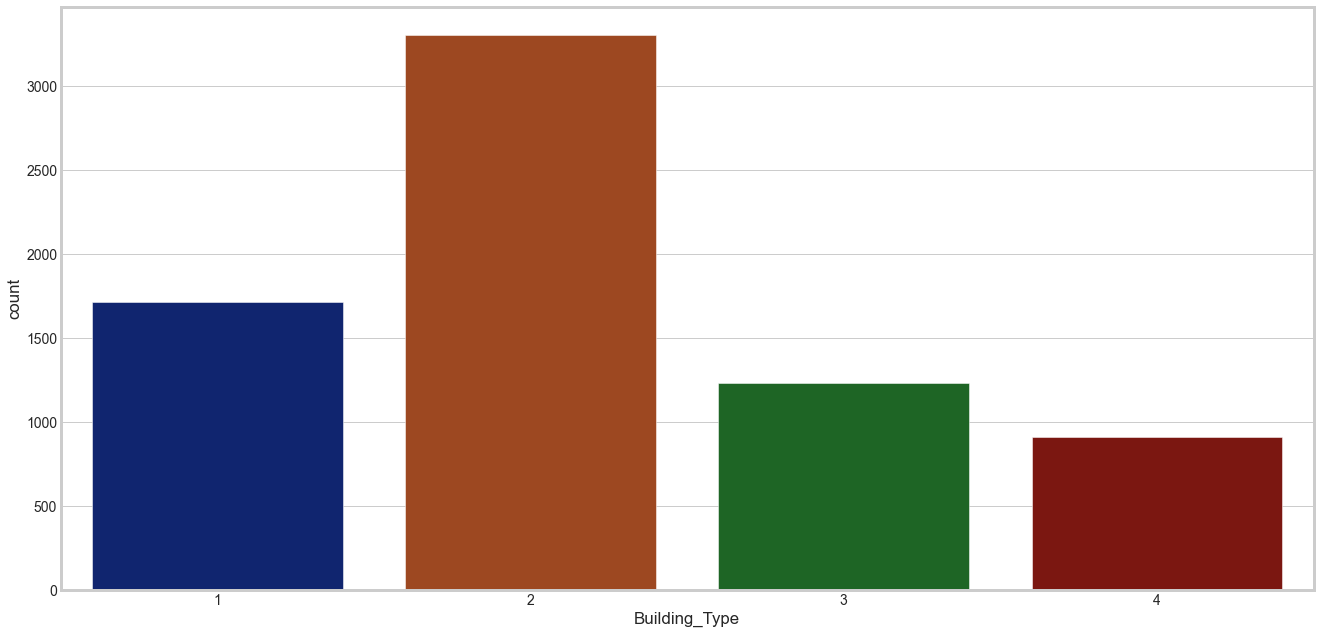

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='Building_Type', palette='dark')

In [20]:
date_of_occupancy = pd.DataFrame(train_data.Date_of_Occupancy.value_counts())

In [21]:
date_of_occupancy

,Date_of_Occupancy
1960.0,1818
1980.0,1155
1988.0,530
1900.0,371
1970.0,285
...,...
1908.0,1
1946.0,1
1939.0,1
1931.0,1


In [22]:
# Converting the date of occupancy to years variable

train_data['Date_of_Occupancy'] = 2020 - train_data['Date_of_Occupancy']

In [23]:
test_data['Date_of_Occupancy'] = 2020 - test_data['Date_of_Occupancy']

In [24]:
test_data['Date_of_Occupancy'].value_counts()

60.0     814
40.0     560
32.0     273
70.0      83
50.0      63
        ... 
8.0        1
164.0      1
89.0       1
69.0       1
270.0      1
Name: Date_of_Occupancy, Length: 89, dtype: int64

In [25]:
def days(col):
    
    
    if col<=0:
        rating = 0
    elif col<=30:
        rating = 1
    elif col<=60:
        rating = 2
    elif col<=90:
        rating = 3
    elif col<=120:
        rating = 4
    elif col<=150:
        rating = 5
    elif col<=180:
        rating = 6
    elif col<=210:
        rating = 7
    elif col<=240:
        rating = 8
    elif col<=270:
        rating = 9
    else:
        rating = 10
    
    return rating

train_data['Date_of_Occupancy'] = train_data['Date_of_Occupancy'].apply(days)
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].apply(days)

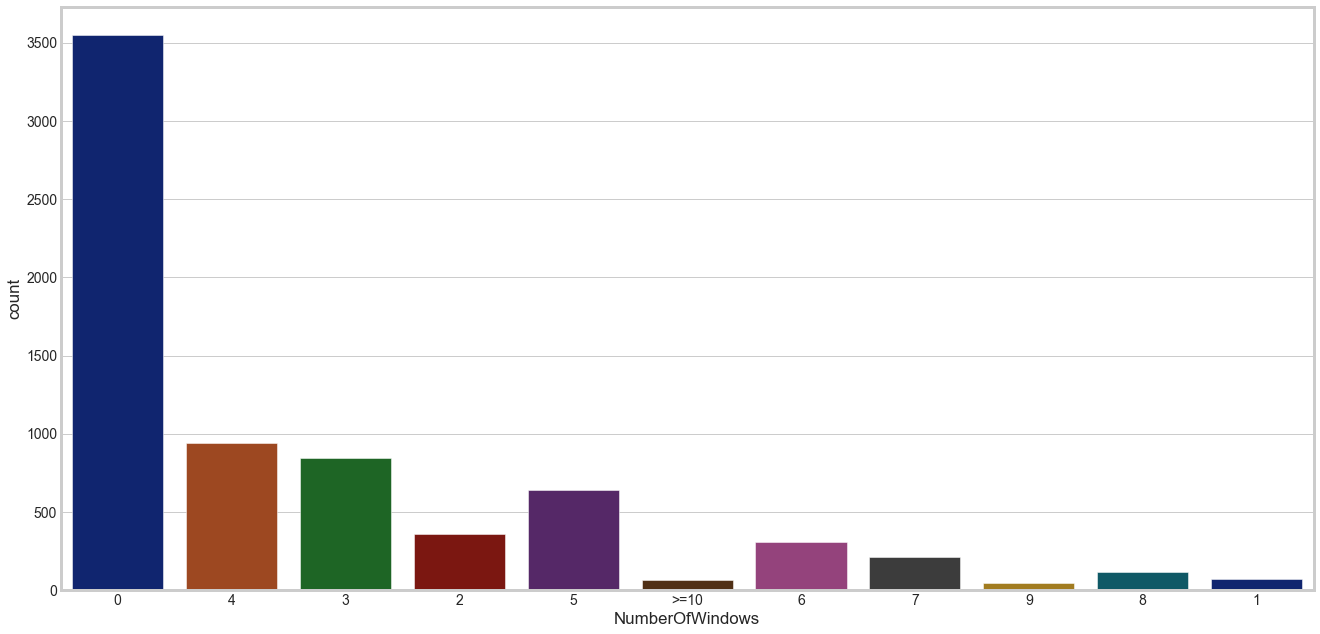

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data= train_data, x='NumberOfWindows', palette = 'dark')

In [27]:
def windows(col):
      
    if col == '>=10':
        return 10
    else:
        return col
    
    return col

train_data['NumberOfWindows'] = train_data['NumberOfWindows'].apply(windows)
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].apply(windows)

In [28]:
train_data['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
211.0       1
3324.0      1
1228.0      1
3762.0      1
1734.0      1
Name: Building Dimension, Length: 2043, dtype: int64

In [29]:
def building_dimension(col):
    
    
    if col<=0:
        rating = 0
    elif col<=1000:
        rating = 1
    elif col<=2000:
        rating = 2
    elif col<=3000:
        rating = 3
    elif col<=4000:
        rating = 4
    elif col<=5000:
        rating = 5
    elif col<=6000:
        rating = 6
    elif col<=7000:
        rating = 7
    elif col<=8000:
        rating = 8
    elif col<=9000:
        rating = 9
    else:
        rating = 10
    
    return rating

train_data['Building Dimension'] = train_data['Building Dimension'].apply(building_dimension)
test_data['Building Dimension'] = test_data['Building Dimension'].apply(building_dimension)

In [30]:
train_data['Insured_Period'].value_counts()

1            5325
99726776      547
0             165
747945205      60
495890411      49
             ... 
180327869       1
341530055       1
487671233       1
797814208       1
535519126       1
Name: Insured_Period, Length: 399, dtype: int64

In [31]:
def insured(col):
    
    
    if col<0:
        rating = 0
    elif col==0:
        rating = 0
    elif col<1:
        rating = 0.5
    elif col==1:
        rating = 1
    else:
        rating = 0
    
    return rating

train_data['Insured_Period'] = train_data['Insured_Period'].apply(insured)
test_data['Insured_Period'] = test_data['Insured_Period'].apply(insured)

In [32]:
train_data.Geo_Code.value_counts()

6088     143
33063    137
6083     113
23353    103
13206     98
        ... 
31446      1
13007      1
68300      1
77431      1
86137      1
Name: Geo_Code, Length: 1306, dtype: int64

In [33]:
def geo_code(col):
    if col == "6088":
        return 5
    elif col == "33063":
        return 4
    elif col == "6083":
        return 3
    elif col == "23353":
        return 2
    elif col == "13206":
        return 1
    else:
        return 0
    
train_data['Geo_Code'] = train_data['Geo_Code'].apply(geo_code)
test_data['Geo_Code'] = test_data['Geo_Code'].apply(geo_code)
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2,1,0,1,0,1,1,1,1,2,0,0,0
1,H2037,4,1,0,0,1,0,0,1,1,6,4,0,0
2,H3802,3,1,0,1,0,1,1,1,1,2,0,0,0
3,H3834,2,1,0,0,0,1,1,3,1,2,0,0,0
4,H5053,3,1,0,0,1,0,0,1,1,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,1,1,1,0,0,1,1,10,1,1,0,0,0
7156,H5926,2,1,0,0,0,1,1,10,2,2,0,0,1
7157,H6204,5,0,0,0,0,1,1,10,1,1,0,0,0
7158,H6537,2,1,0,0,0,1,1,10,1,2,0,0,0


## Multivariate Analysis

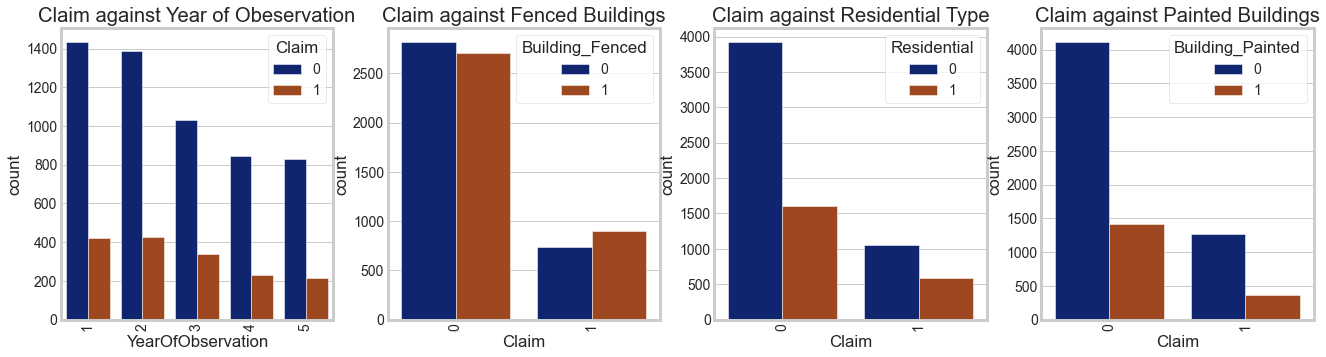

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))


plt.subplot(1,4,1)
sns.countplot(x = "YearOfObservation" ,hue="Claim", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Year of Obeservation")

plt.subplot(1,4,2)
sns.countplot(x = "Claim" ,hue="Building_Fenced", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Fenced Buildings")

plt.subplot(1,4,3)
sns.countplot(x = "Claim" ,hue="Residential", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Residential Type")

plt.subplot(1,4,4)
sns.countplot(x = "Claim" ,hue="Building_Painted", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Painted Buildings")

          
plt.show()

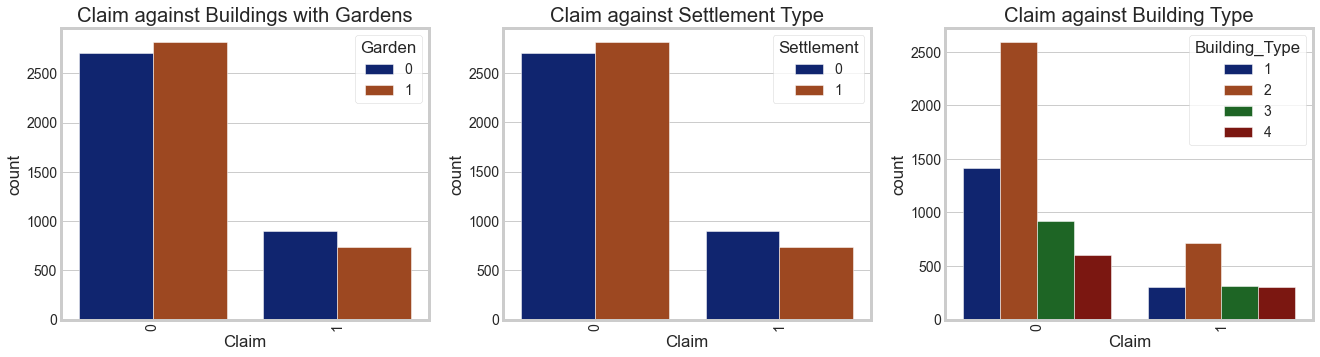

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(x = "Claim", hue="Garden", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Buildings with Gardens")

plt.subplot(1,3,2)
sns.countplot(x = "Claim", hue="Settlement", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Settlement Type")

plt.subplot(1,3,3)
sns.countplot(x = "Claim", hue="Building_Type", data=train_data, palette="dark")
plt.xticks(rotation=90)
plt.title("Claim against Building Type")
          
plt.show()

# Further engineering the features of the data set so we can see which of our independent variables affect our target variable "Claim"

The train dataset has 1634 Claimed Insurance.
The train dataset has 5526 Unlaimed Insurance.


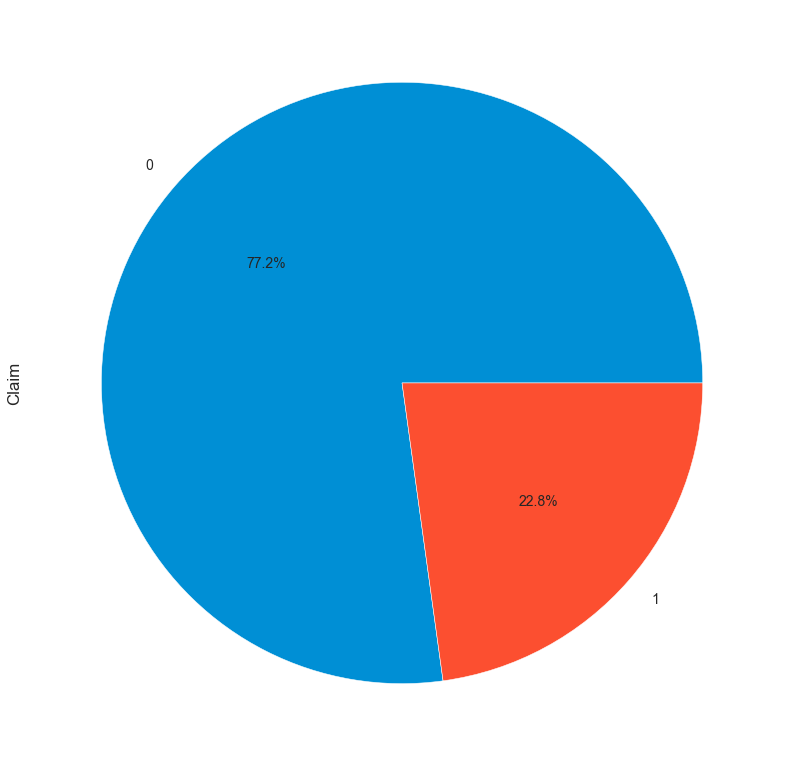

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,20))

ClaimedCount = train_data['Claim'].value_counts()[1]
UnclaimedCount = train_data['Claim'].value_counts()[0]
print('The train dataset has {} Claimed Insurance.'.format(ClaimedCount))
print('The train dataset has {} Unlaimed Insurance.'.format(UnclaimedCount))

train_data['Claim'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [37]:
# replacing missing values on train data with the average value of the columns

train_data['Date_of_Occupancy'].fillna(round(train_data['Date_of_Occupancy'].mean()), inplace=True)
train_data['Building Dimension'].fillna(round(train_data['Building Dimension'].mean()), inplace=True)

In [38]:
# replacing missing values on the test data with the average values of the columns

test_data['Date_of_Occupancy'].fillna(round(test_data['Date_of_Occupancy'].mean()), inplace=True)
test_data['Building Dimension'].fillna(round(test_data['Building Dimension'].mean()), inplace=True)

In [39]:
Unclaimed = train_data[train_data['Claim'] == 0]
Claimed = train_data[train_data['Claim'] == 1]

In [40]:
random_sample = Unclaimed.sample(ClaimedCount)
random_sample

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
4690,H17031,2,1,0,0,1,0,0,3,1,1,3,0,0
5116,H13821,4,0,1,1,0,1,1,2,4,2,0,0,0
6099,H18645,5,0,0,0,1,0,0,3,2,1,3,0,0
2310,H18144,1,0,0,0,1,0,0,1,3,3,2,0,0
3540,H7339,2,0,0,1,0,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,H17912,3,1,0,0,1,0,0,1,4,4,3,0,0
2001,H3079,5,1,1,0,1,0,0,3,2,2,3,0,0
6342,H12771,2,1,0,0,1,0,0,2,3,1,4,0,0
2801,H14580,1,1,1,1,0,1,1,1,2,2,0,0,0


In [41]:
new_train_data = pd.concat([Claimed, random_sample])
len(new_train_data)

3268

In [42]:
new_train_data1 = new_train_data.sample(len(test_data))
len(new_train_data1)

3069

In [43]:
new_train_data1 = new_train_data1.sample(frac=1).reset_index(drop=True)
new_train_data1.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H4586,4,1,0,0,0,1,1,1,4,2,0,0,0
1,H435,1,1,0,0,0,1,1,1,2,2,0,0,0
2,H16670,1,1,0,0,0,1,1,10,2,1,0,0,0
3,H17265,1,1,0,0,1,0,0,1,3,3,4,0,1
4,H6583,1,1,1,0,0,1,1,1,3,10,0,0,0
5,H18766,2,1,0,0,1,0,0,4,4,1,3,0,1
6,H18237,5,1,0,0,1,0,0,1,2,2,2,0,1
7,H2335,3,1,0,1,0,1,1,1,2,2,0,0,1
8,H16866,4,0,0,0,1,0,0,1,2,3,2,0,0
9,H18906,5,0,1,0,1,0,0,6,2,1,5,0,0


## t-SNE visualisation to view how distinct the claimed and unclaimed insurance cases are 

In [44]:
X = test_data.drop(['Customer Id'], axis=1)
Y = new_train_data1['Claim']

In [45]:
X1 = X.values
Y1 = Y.values

In [46]:
x = test_data.drop(['Customer Id'], axis=1)
y = test_data['Customer Id']

In [47]:
x1 = x.values

In [48]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=50).fit_transform(X.values)

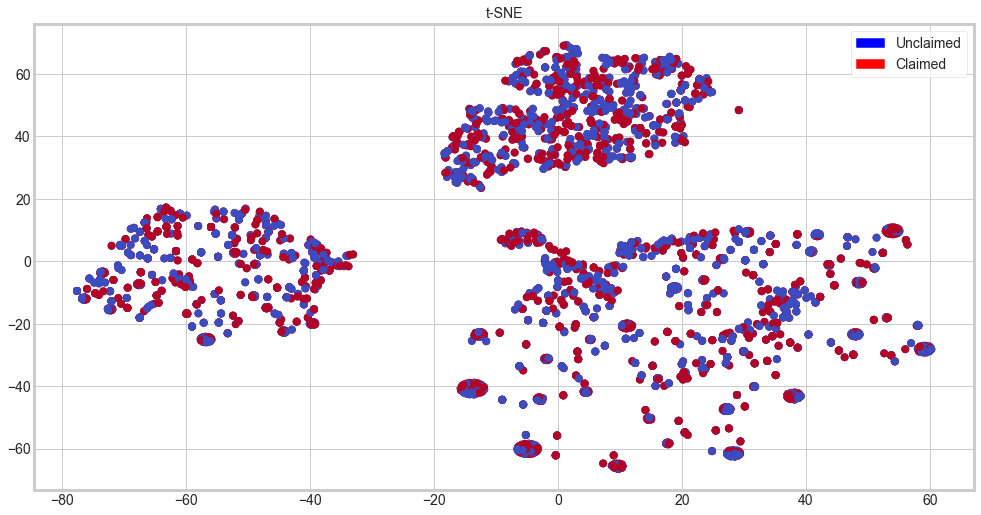

In [49]:
# t_SNE plot
f, ax = plt.subplots(figsize=(15,8))


blue_patch = mpatches.Patch(color='blue', label='Unclaimed')
red_patch = mpatches.Patch(color='red', label='Claimed')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='Unclaimed', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='Claimed', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

## Models

In [50]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## train_test_split to show us which of these algorithms is likely to perform the best for prediction with the new_train_data and the test_data

In [51]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

X_train = X_train.values
X_validation = X_test.values
Y_train = Y_train.values
Y_validation = Y_test.values

In [52]:
# Creating a list for the models to be stored in
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

# computing the models' accuracy score
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=20)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    test_scores = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(test_scores)

LR: 0.507472 (0.050910)
LDA: 0.509540 (0.051756)
KNN: 0.512565 (0.017181)
CART: 0.498984 (0.038488)
SVM: 0.477579 (0.027574)
XGB: 0.509391 (0.045478)
RF: 0.509705 (0.042115)
NB: 0.471821 (0.044367)


# Random Forest Classifier

In [53]:
#Random Forest Classifier with 10 fold estimators
rfc = RandomForestClassifier(n_estimators=1000)
rfc_fit = rfc.fit(X, Y)
rfc_predicted = rfc.predict(X)
rfc_probs = rfc.predict_proba(X)[:, 1]

In [54]:
# calculate roc auc
rfc_roc_value = roc_auc_score(Y, rfc_probs)
rfc_roc_value

0.8633517990481748

In [55]:
rfc_roc_pred = roc_auc_score(Y, rfc_predicted)
rfc_roc_pred

0.7536566192452839

In [56]:
rfc_predicted = pd.DataFrame(rfc_predicted)
rfc_predicted1 = pd.concat([y, rfc_predicted], axis = 1)
rfc_predicted1 =rfc_predicted1.rename(columns={0: 'Claim'})
rfc_predicted1

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,1
3,H7493,1
4,H7494,0
...,...,...
3064,H11583,1
3065,H11720,0
3066,H11721,1
3067,H12408,1


rfc_predicted1.to_csv('m_submission.csv')

# Linear Discriminant Analysis.

In [57]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=10000000)
lda_fit = lda.fit(X, Y)
lda_predicted = lda.predict(X)
lda_probs = lda.predict_proba(X)[:, 1]

# calculate roc auc
lda_roc_value = roc_auc_score(Y, lda_probs)
lda_roc_value

0.520017336027595

In [58]:
lda_roc_pred = roc_auc_score(Y, lda_predicted)
lda_roc_pred

0.5129491462367399

# Naive Bayes

In [59]:
# Naive Bayes
nb = GaussianNB()
nb_fit = nb.fit(X, Y)
nb_predicted = nb.predict(X)
nb_probs = nb.predict_proba(X)[:, 1]

# calculate roc auc
nb_roc_value = roc_auc_score(Y, nb_probs)
nb_roc_value

0.5187143734440256

# Logistic Regression

In [60]:
# Logistic Regression
glm = LogisticRegression()
glm_fit = glm.fit(X, Y)
glm_predicted = glm.predict(X)
glm_probs = glm.predict_proba(X)[:, 1]

# calculate roc auc
glm_roc_value = roc_auc_score(Y, glm_probs)
glm_roc_value

0.5200126643886056

## Keras Classification (Deep Learning) Algorithm.

In [78]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [62]:
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y1)

In [63]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=11, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [64]:
scaler = StandardScaler().fit(X1)
X_tr = scaler.transform(X1)
test_tr = scaler.transform(x1)  # evaluate baseline model with standardized dataset

In [65]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X1, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Colocations handled automatically by placer.
Standardized: nan% (nan%)


In [68]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(12,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X1, Y1,epochs=10, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6986 - accuracy: 0.5044
Epoch 2/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6955 - accuracy: 0.4930
Epoch 3/10
3069/3069 [==============================] - 5s 2ms/step - loss: 0.6944 - accuracy: 0.4985
Epoch 4/10
3069/3069 [==============================] - 5s 2ms/step - loss: 0.6945 - accuracy: 0.4930
Epoch 5/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6942 - accuracy: 0.4865
Epoch 6/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6939 - accuracy: 0.5018
Epoch 7/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6938 - accuracy: 0.4982
Epoch 8/10
3069/3069 [==============================] - 4s 1ms/step - loss: 0.6935 - accuracy: 0.5125
Epoch 9/10
3069/3069 [==============================] - 5s 1ms/step - loss: 0.6936 - accuracy: 0.5024
Epoch 10/10
3069/3069 [===========

In [70]:
for layer in model.layers:
    weights = layer.get_weights()

In [71]:
score = model.evaluate(X1, Y1,verbose=1)
print(score)

3069/3069 [==============================] - 0s 43us/step
[0.6921992405651834, 0.5109156370162964]


In [72]:
Y_pred = model.predict_classes(x1)

In [73]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred

,0
0,1
1,1
2,0
3,1
4,1
...,...
3064,0
3065,0
3066,1
3067,1


In [74]:
df = pd.concat([y, Y_pred], axis = 1)
df = df.rename(columns={0: 'Claim'})
df

,Customer Id,Claim
0,H11920,1
1,H11921,1
2,H9805,0
3,H7493,1
4,H7494,1
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,1
3067,H12408,1


In [75]:
df.to_csv('my submission.csv')

2

In [89]:
model2 = Sequential()
model2.add(Dense(16, activation='relu', input_shape=(12,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(3, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

In [90]:
model2.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model2.fit(X1, Y1,epochs=5, batch_size=1, verbose=1)

Epoch 1/5
3069/3069 [==============================] - 5s 2ms/step - loss: 0.6981 - accuracy: 0.4998
Epoch 2/5
3069/3069 [==============================] - 5s 1ms/step - loss: 0.6947 - accuracy: 0.4858
Epoch 3/5
3069/3069 [==============================] - 5s 2ms/step - loss: 0.6936 - accuracy: 0.5031
Epoch 4/5
3069/3069 [==============================] - 5s 1ms/step - loss: 0.6941 - accuracy: 0.4923
Epoch 5/5
3069/3069 [==============================] - 5s 2ms/step - loss: 0.6944 - accuracy: 0.4972


In [91]:
for layer in model2.layers:
    weights = layer.get_weights()

In [92]:
score = model2.evaluate(X1, Y1,verbose=1)
print(score)

3069/3069 [==============================] - 0s 51us/step
[0.69234513710127, 0.5236233472824097]
